## The Dataset

The current dataset is one from kaggle (https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset), comprised of recent real estate listings from across the United States. The end dataset will be comprised of data from this set and data obtained through the use of the Zillow API. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("./dataset/realtor-data.csv")
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
#filter data
filter_mask = [city == "Philadelphia"  or city == "New York" for city in df["city"]]

#date >= dt.strptime("2018-09-01", "%Y-%m-%d") for date in AAPL["Date"]

filtered_df = df[filter_mask]

In [ ]:
# Drop acre_lot column
filtered_df.drop('acre_lot', axis=1, inplace=True)

C:\Users\Rohan\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
filtered_df.head(10)

,status,price,bed,bath,full_address,street,city,state,zip_code,house_size,sold_date
465089,for_sale,1185000.0,2.0,2.0,"175 E 74th St Apt 7C, New York, NY, 10021",175 E 74th St Apt 7C,New York,New York,10021.0,NaN,NaN
465111,for_sale,29995000.0,12.0,14.0,"271 W 11th St, New York, NY, 10014",271 W 11th St,New York,New York,10014.0,8528.0,NaN
465513,for_sale,895000.0,2.0,2.0,"440 E 56th St Unit 4G, New York, NY, 10022",440 E 56th St Unit 4G,New York,New York,10022.0,1425.0,NaN
465515,for_sale,985000.0,1.0,2.0,"55 Wall St Apt 626, New York, NY, 10005",55 Wall St Apt 626,New York,New York,10005.0,1166.0,2014-01-10
465516,for_sale,810000.0,1.0,1.0,"304 E 65th St Apt 3C, New York, NY, 10065",304 E 65th St Apt 3C,New York,New York,10065.0,761.0,2020-08-18
465522,for_sale,740000.0,2.0,2.0,"435 Convent Ave Apt 24, New York, NY, 10031",435 Convent Ave Apt 24,New York,New York,10031.0,NaN,NaN
465540,for_sale,485000.0,1.0,1.0,"241 E 76th St Apt 9J, New York, NY, 10021",241 E 76th St Apt 9J,New York,New York,10021.0,NaN,NaN
465547,for_sale,899000.0,2.0,2.0,"438 Clermont Ave Apt G, New York, NY, 11238",438 Clermont Ave Apt G,New York,New York,11238.0,NaN,2018-06-29
465551,for_sale,1550000.0,3.0,1.0,"99 E 4th St Apt 4F, New York, NY, 10003",99 E 4th St Apt 4F,New York,New York,10003.0,NaN,2015-05-07
465557,for_sale,10750000.0,3.0,5.0,"111 W 57th St Unit 11A, New York, NY, 10019",111 W 57th St Unit 11A,New York,New York,10019.0,3596.0,NaN


### EDA

In [ ]:
for x in list(filtered_df.columns):
    print("For column", x,"the unique values are", filtered_df[x].nunique())

For column status the unique values are 2
For column price the unique values are 1919
For column bed the unique values are 19
For column bath the unique values are 18
For column acre_lot the unique values are 60
For column full_address the unique values are 10488
For column street the unique values are 10477
For column city the unique values are 2
For column state the unique values are 2
For column zip_code the unique values are 150
For column house_size the unique values are 2301
For column sold_date the unique values are 3908


In [ ]:
# How many NaN's in each feature
filtered_df.isnull().sum()

status              0
price               0
bed              6987
bath             1520
acre_lot        48270
full_address        0
street             20
city                0
state               0
zip_code            2
house_size      20569
sold_date       24499
dtype: int64

### Zillow API

# Zillow Home value Index



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
tf = pd.read_csv("/content/Zillow Home Value Index .csv")
tf.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,2022-10-31,2022-12-31,2023-09-30
0,102001,0,United States,country,NaN,2022-09-30,0.1,0.4,1.4
1,394913,1,"New York, NY",msa,NY,2022-09-30,0.1,0.0,-1.0
2,753899,2,"Los Angeles, CA",msa,CA,2022-09-30,-1.3,-2.0,-2.4
3,394463,3,"Chicago, IL",msa,IL,2022-09-30,0.2,0.3,-0.9
4,394514,4,"Dallas, TX",msa,TX,2022-09-30,-0.1,0.1,2.0


In [4]:
hf = pd.read_csv("/content/RAW.csv")
hf.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,102001,0,United States,country,NaN,128394.0,128741.0,129106.0,129850.0,130601.0,...,323952.0,328694.0,333922.0,339203.0,344769.0,349812.0,353999.0,356409.0,357454.0,357810.0
1,394913,1,"New York, NY",msa,NY,224378.0,225719.0,226925.0,229300.0,231511.0,...,576079.0,580036.0,584670.0,591092.0,598215.0,605722.0,611724.0,616039.0,618322.0,619306.0
2,753899,2,"Los Angeles, CA",msa,CA,228554.0,229350.0,230569.0,232887.0,235372.0,...,857906.0,868566.0,880763.0,898057.0,917099.0,933519.0,934849.0,931730.0,917721.0,908160.0
3,394463,3,"Chicago, IL",msa,IL,168967.0,169365.0,169881.0,170914.0,172008.0,...,289748.0,292367.0,294918.0,298193.0,301638.0,305578.0,308544.0,310381.0,310702.0,311001.0
4,394514,4,"Dallas, TX",msa,TX,129238.0,129341.0,129427.0,129637.0,129857.0,...,341324.0,348670.0,357093.0,365109.0,374506.0,383123.0,390602.0,392784.0,391848.0,390152.0


# EDA

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1038d6310>,
      dtype=object)

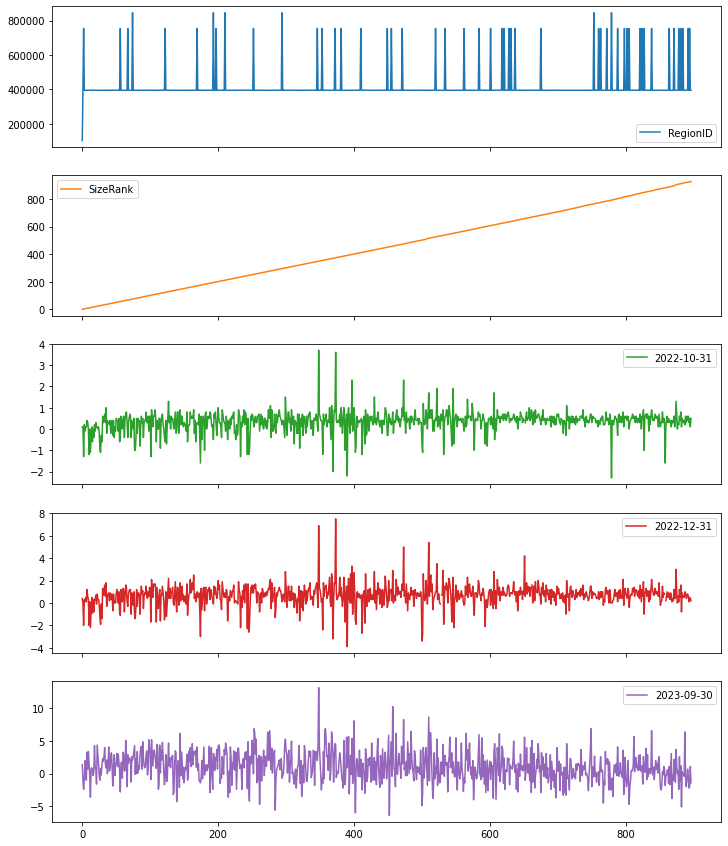

In [6]:
import matplotlib.pyplot as plt
tf.plot(subplots=True, figsize=(12, 15))

In [7]:
hf.groupby('StateName')['2022-09-30'].sum().sort_values(ascending = False)

StateName
CA    19682977.0
TX    14262171.0
FL    10766940.0
CO    10156075.0
NC     9715798.0
WA     9705730.0
OR     8865520.0
OH     8503331.0
GA     7632217.0
PA     7012262.0
IN     6870079.0
MI     6567884.0
TN     6225878.0
ID     6043976.0
NY     5734146.0
WI     5578497.0
MN     5538339.0
MO     4795038.0
UT     4333359.0
AZ     4195196.0
NV     4093648.0
NM     4084656.0
AL     3905800.0
IL     3869296.0
VA     3829777.0
SC     3776856.0
WY     3670403.0
MA     3669362.0
KY     3625917.0
HI     3610274.0
IA     3573052.0
MT     3337269.0
KS     3174987.0
LA     3047022.0
OK     3004009.0
AR     2964654.0
SD     2832811.0
MS     2716666.0
NE     2646399.0
NH     2152785.0
CT     1919162.0
ND     1910565.0
MD     1834702.0
NJ     1525576.0
AK     1442268.0
VT     1395077.0
ME     1294335.0
WV     1098875.0
DE      719574.0
RI      450387.0
Name: 2022-09-30, dtype: float64

In [10]:
hf.groupby('RegionName')['2022-09-30'].sum().sort_values(ascending = False)

RegionName
San Francisco, CA     1388998.0
Edwards, CO           1284119.0
Santa Cruz, CA        1233224.0
Vineyard Haven, MA    1233145.0
Kahului, HI           1099984.0
                        ...    
Camden, AR              74475.0
Selma, AL               74043.0
Forrest City, AR        72056.0
Helena, AR              38424.0
San Jose, CA                0.0
Name: 2022-09-30, Length: 893, dtype: float64

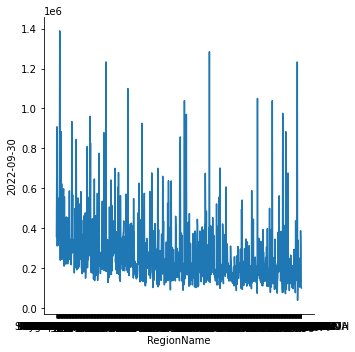

In [9]:
sns.relplot(data=hf,x='RegionName',y='2022-09-30',kind="line")

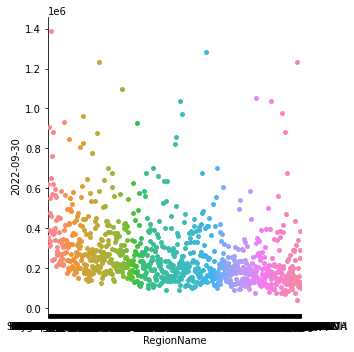

In [11]:
sns.catplot(data=hf, x="RegionName", y="2022-09-30")

In [8]:
df2 = hf.query('RegionName =="San Francisco, CA"')

In [19]:
df2

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
12,395057,12,"San Francisco, CA",msa,CA,350068.0,351941.0,354551.0,361685.0,370688.0,...,1348491.0,1365222.0,1387495.0,1415134.0,1439466.0,1453427.0,1451902.0,1438398.0,1410136.0,1388998.0


In [22]:
desired = [('2022-09-30'), 
           ('2022-07-31'), 
           ('2022-05-31')]

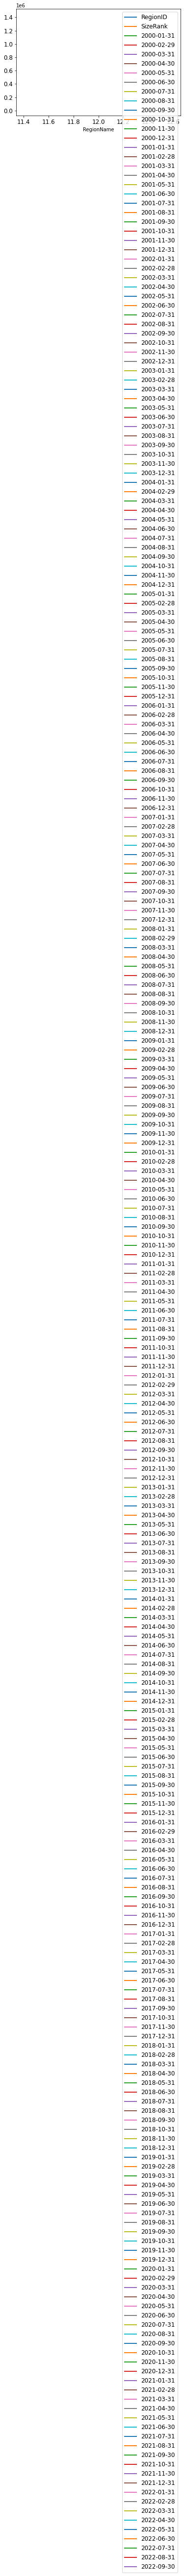

In [20]:
ax = df2.plot(linewidth=2, fontsize=12);

# Additional customizations
ax.set_xlabel('RegionName');
ax.legend(fontsize=12);